# Deep-Learning Lab Session

In [99]:
import warnings
warnings.filterwarnings('ignore')

In [100]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import BatchNormalization
from keras.regularizers import l2
import matplotlib.pyplot as plt

## Loading MNIST Data from Keras

MNIST is a database. The acronym stands for “Modified National Institute of Standards and Technology.” The MNIST 

database contains handwritten digits (0 through 9), and can provide a baseline for testing image processing systems. 


In [101]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

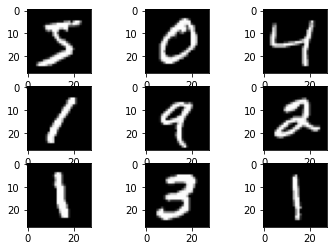

In [102]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [103]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


## Normalizing

In [104]:
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

In [105]:
print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [106]:
print(x_train.shape[0])

60000


In [107]:
print((x_train.shape[1:]))

(28, 28)


In [108]:
print(np.prod(x_train.shape[1:]))

784


In [109]:
x_train = x_train.reshape(x_train.shape[0], np.prod(x_train.shape[1:]))
x_test = x_test.reshape(x_test.shape[0], np.prod(x_test.shape[1:]))

print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [110]:
print(y_train)
print(y_train.shape)

[5 0 4 ... 5 6 8]
(60000,)


## One hot encoding the Target variable

In [111]:
n_classes = 10
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)

In [112]:
print(y_train)
print(y_train.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
(60000, 10)



### Layers, Data and Learning Representations

<br />

* __Layers__: logically grouped operations in a neural network, the parameters for the operations in the layer learn to generate the best features to predict the target
 
<img src='img/nn_layers.jpeg' width='400px'/>

<img src='img/nn_layer_operations.png' width='650px'/>

<br />

* The network needs to have __input data__ and corresponding __targets (y)__

<br />

* In traditional machine learning we see that changing the representation of the data (kernel trick, etc.) helps ease the process of learning from data

<br />

* __Activation function__ adds that non linearity and in combination with weights (parameters) of a layer, the network learns better representations of the data at each layer

<br />

### So basically, each layer takes input as data and spits out transformed data as output, simple as that. Now, let's dive into the details

<img src='img/learning_representations_mlp.jpg' />

<br />

* The goal of training neural networks is to find these perfect representation of data, which we get by "learning" the right weights

<img src='img/learning_weights.jpg' />

<br />
 
* The loss function, which defines the feedback signal used for learning helps guage __how different are the targets and the predicted targets__

<img src='img/loss_function.jpg' />

<br />
 
* The optimizer, based on the feedback signal from the loss function changes the parameters / weights of the network to help make the predictions as close to the target as possible (minimizing the loss function)

<br />

<img src='img/building_blocks_of_neural_networks.jpg' />

# Neural Network Architecture

## 1. Basic Network with 1 Hidden Layer

In [113]:
model1 = Sequential()

In [114]:
model1.add(Dense(512, input_shape = (784,), activation= 'sigmoid'))
model1.add(Dense(n_classes, activation = 'softmax'))

In [115]:
model1.compile(optimizer="sgd", loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [116]:
model1.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_30 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [117]:
784*512 + 512

401920

In [118]:
history = model1.fit(x_train, y_train, batch_size=128, epochs=10, verbose=True, validation_data= (x_test, y_test)) #validation_split=.1
loss, accuracy  = model1.evaluate(x_test, y_test, verbose=False)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 61us/step - loss: 1.9551 - accuracy: 0.5550 - val_loss: 1.6177 - val_accuracy: 0.7436
Epoch 2/10
60000/60000 [==============================] - 4s 60us/step - loss: 1.3841 - accuracy: 0.7673 - val_loss: 1.1580 - val_accuracy: 0.8150
Epoch 3/10
60000/60000 [==============================] - 4s 70us/step - loss: 1.0326 - accuracy: 0.8116 - val_loss: 0.8937 - val_accuracy: 0.8396
Epoch 4/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.8316 - accuracy: 0.8342 - val_loss: 0.7420 - val_accuracy: 0.8511
Epoch 5/10
60000/60000 [==============================] - 3s 55us/step - loss: 0.7111 - accuracy: 0.8478 - val_loss: 0.6462 - val_accuracy: 0.8622
Epoch 6/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.6329 - accuracy: 0.8572 - val_loss: 0.5824 - val_accuracy: 0.8691
Epoch 7/10
60000/60000 [==============================] - 3s 50us/st

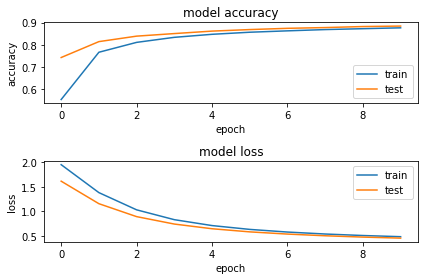

In [119]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

## Model Evaluation

In [120]:
loss_and_metrics = model1.evaluate(x_train, y_train, verbose=2)

print("Train Loss", loss_and_metrics[0])
print("Train Accuracy", loss_and_metrics[1])

Train Loss 0.47387717463175455
Train Accuracy 0.8772333264350891


In [121]:
loss_and_metrics = model1.evaluate(x_test, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

Test Loss 0.4545838043689728
Test Accuracy 0.8848000168800354


## 2. Network with 2 Hidden Layers

In [122]:
model2= Sequential()

In [123]:
model2.add(Dense(512, input_shape = (784,), activation= 'sigmoid'))
model2.add(Dense(100, activation = 'sigmoid'))
model2.add(Dense(n_classes, activation = 'softmax'))
model2.compile(optimizer="sgd", loss = 'categorical_crossentropy', metrics = ['accuracy'])
model2.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_32 (Dense)             (None, 100)               51300     
_________________________________________________________________
dense_33 (Dense)             (None, 10)                1010      
Total params: 454,230
Trainable params: 454,230
Non-trainable params: 0
_________________________________________________________________


In [27]:
history = model2.fit(x_train, y_train, batch_size=128, epochs=10, verbose=True, validation_data= (x_test, y_test)) #validation_split=.1
loss, accuracy  = model2.evaluate(x_test, y_test, verbose=True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 72us/step - loss: 2.1820 - accuracy: 0.4466 - val_loss: 2.1290 - val_accuracy: 0.5148
Epoch 2/10
60000/60000 [==============================] - 3s 57us/step - loss: 2.0716 - accuracy: 0.5619 - val_loss: 1.9941 - val_accuracy: 0.5956
Epoch 3/10
60000/60000 [==============================] - 4s 65us/step - loss: 1.9126 - accuracy: 0.6060 - val_loss: 1.8048 - val_accuracy: 0.6285
Epoch 4/10
60000/60000 [==============================] - 3s 55us/step - loss: 1.7046 - accuracy: 0.6424 - val_loss: 1.5777 - val_accuracy: 0.6459
Epoch 5/10
60000/60000 [==============================] - 4s 63us/step - loss: 1.4806 - accuracy: 0.6751 - val_loss: 1.3582 - val_accuracy: 0.7027
Epoch 6/10
60000/60000 [==============================] - 3s 53us/step - loss: 1.2802 - accuracy: 0.7149 - val_loss: 1.1762 - val_accuracy: 0.7356
Epoch 7/10
60000/60000 [==============================] - 4s 61us/st

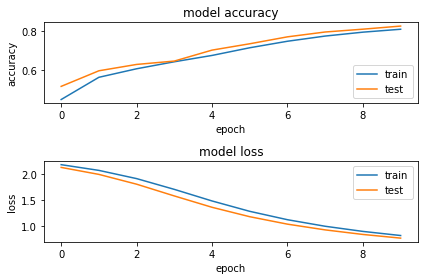

In [29]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

## Model Evaluation

In [30]:
loss_and_metrics = model2.evaluate(x_train, y_train, verbose=2)

print("Train Loss", loss_and_metrics[0])
print("Train Accuracy", loss_and_metrics[1])

Train Loss 0.7785738595167796
Train Accuracy 0.8209999799728394


In [31]:
loss_and_metrics = model2.evaluate(x_test, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

Test Loss 0.7623496227264405
Test Accuracy 0.8273000121116638


## 3. Network with 3 Hidden Layers

In [32]:
model3= Sequential()

In [33]:
model3.add(Dense(512, input_shape = (784,), activation= 'sigmoid'))
model3.add(Dense(100, activation = 'sigmoid'))
model3.add(Dense(100, activation = 'sigmoid'))
model3.add(Dense(n_classes, activation = 'softmax'))
model3.compile(optimizer="sgd", loss = 'categorical_crossentropy', metrics = ['accuracy'])
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               51300     
_________________________________________________________________
dense_8 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1010      
Total params: 464,330
Trainable params: 464,330
Non-trainable params: 0
_________________________________________________________________


In [34]:
history = model3.fit(x_train, y_train, batch_size=128, epochs=10, verbose=True, validation_data= (x_test, y_test)) #validation_split=.1
loss, accuracy  = model3.evaluate(x_test, y_test, verbose=True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 74us/step - loss: 2.3044 - accuracy: 0.1118 - val_loss: 2.2963 - val_accuracy: 0.1135
Epoch 2/10
60000/60000 [==============================] - 4s 66us/step - loss: 2.2942 - accuracy: 0.1225 - val_loss: 2.2920 - val_accuracy: 0.2305
Epoch 3/10
60000/60000 [==============================] - 4s 68us/step - loss: 2.2889 - accuracy: 0.1344 - val_loss: 2.2854 - val_accuracy: 0.1150
Epoch 4/10
60000/60000 [==============================] - 4s 64us/step - loss: 2.2829 - accuracy: 0.1424 - val_loss: 2.2791 - val_accuracy: 0.1813
Epoch 5/10
60000/60000 [==============================] - 3s 57us/step - loss: 2.2759 - accuracy: 0.1650 - val_loss: 2.2715 - val_accuracy: 0.2703
Epoch 6/10
60000/60000 [==============================] - 3s 56us/step - loss: 2.2672 - accuracy: 0.2089 - val_loss: 2.2611 - val_accuracy: 0.2267
Epoch 7/10
60000/60000 [==============================] - 4s 59us/st

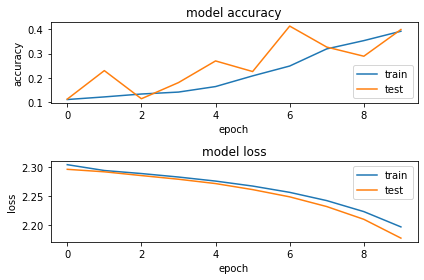

In [35]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

## Model Evaluation

In [36]:
loss_and_metrics = model3.evaluate(x_train, y_train, verbose=2)

print("Train Loss", loss_and_metrics[0])
print("Train Accuracy", loss_and_metrics[1])

Train Loss 2.1791251449584963
Train Accuracy 0.3901500105857849


In [37]:
loss_and_metrics = model3.evaluate(x_test, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

Test Loss 2.1767766773223878
Test Accuracy 0.3991999924182892


## 4. Network with 2 layers and ReLU as an activation func for 1 layer

In [38]:
model4= Sequential()

In [39]:
model4.add(Dense(512, input_shape = (784,), activation= 'sigmoid'))
model4.add(Dense(100, activation = 'relu'))
model4.add(Dense(n_classes, activation = 'softmax'))
model4.compile(optimizer="sgd", loss = 'categorical_crossentropy', metrics = ['accuracy'])
model4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_11 (Dense)             (None, 100)               51300     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1010      
Total params: 454,230
Trainable params: 454,230
Non-trainable params: 0
_________________________________________________________________


In [40]:
history = model4.fit(x_train, y_train, batch_size=128, epochs=10, verbose=True, validation_data= (x_test, y_test)) #validation_split=.1
loss, accuracy  = model4.evaluate(x_test, y_test, verbose=True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 73us/step - loss: 1.9697 - accuracy: 0.5224 - val_loss: 1.5756 - val_accuracy: 0.7177
Epoch 2/10
60000/60000 [==============================] - 5s 76us/step - loss: 1.2364 - accuracy: 0.7590 - val_loss: 0.9355 - val_accuracy: 0.8069
Epoch 3/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.7940 - accuracy: 0.8240 - val_loss: 0.6590 - val_accuracy: 0.8462
Epoch 4/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.6054 - accuracy: 0.8516 - val_loss: 0.5348 - val_accuracy: 0.8690
Epoch 5/10
60000/60000 [==============================] - 3s 58us/step - loss: 0.5139 - accuracy: 0.8675 - val_loss: 0.4649 - val_accuracy: 0.8797
Epoch 6/10
60000/60000 [==============================] - 4s 59us/step - loss: 0.4616 - accuracy: 0.8754 - val_loss: 0.4254 - val_accuracy: 0.8853
Epoch 7/10
60000/60000 [==============================] - 4s 65us/st

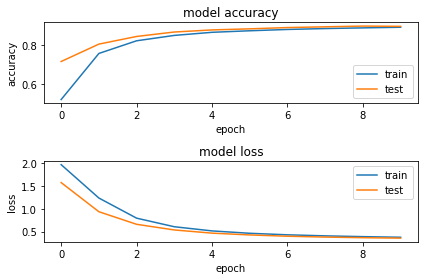

In [41]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

##  Model Evaluation

In [42]:
loss_and_metrics = model4.evaluate(x_train, y_train, verbose=2)

print("Train Loss", loss_and_metrics[0])
print("Train Accuracy", loss_and_metrics[1])

Train Loss 0.3707176497856776
Train Accuracy 0.8936333060264587


In [43]:
loss_and_metrics = model4.evaluate(x_test, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

Test Loss 0.3552423629164696
Test Accuracy 0.8980000019073486


## 5. Network with 2 layers and ReLU as an activation func for 1 layer and ADAM optimiser

In [44]:
model5= Sequential()

In [45]:
model5.add(Dense(512, input_shape = (784,), activation= 'sigmoid'))
model5.add(Dense(100, activation = 'relu'))
model5.add(Dense(n_classes, activation = 'softmax'))
model5.compile(optimizer="adam", loss = 'categorical_crossentropy', metrics = ['accuracy'])
model5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_14 (Dense)             (None, 100)               51300     
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1010      
Total params: 454,230
Trainable params: 454,230
Non-trainable params: 0
_________________________________________________________________


In [46]:
history = model5.fit(x_train, y_train, batch_size=128, epochs=10, verbose=True, validation_data= (x_test, y_test)) #validation_split=.1
loss, accuracy  = model5.evaluate(x_test, y_test, verbose=True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 102us/step - loss: 0.4407 - accuracy: 0.8769 - val_loss: 0.2713 - val_accuracy: 0.9188
Epoch 2/10
60000/60000 [==============================] - 6s 92us/step - loss: 0.2274 - accuracy: 0.9332 - val_loss: 0.2143 - val_accuracy: 0.9324
Epoch 3/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.1675 - accuracy: 0.9511 - val_loss: 0.1462 - val_accuracy: 0.9569
Epoch 4/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.1305 - accuracy: 0.9609 - val_loss: 0.1162 - val_accuracy: 0.9634
Epoch 5/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.1028 - accuracy: 0.9686 - val_loss: 0.1160 - val_accuracy: 0.9643
Epoch 6/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.0819 - accuracy: 0.9753 - val_loss: 0.0993 - val_accuracy: 0.9710
Epoch 7/10
60000/60000 [==============================] - 5s 85us/s

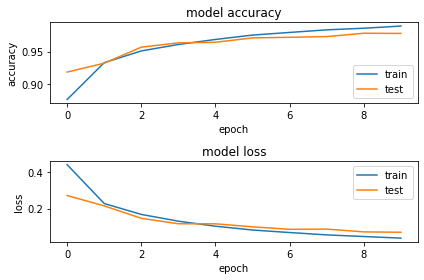

In [47]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

##  Model Evaluation

In [48]:
loss_and_metrics = model5.evaluate(x_train, y_train, verbose=2)

print("Train Loss", loss_and_metrics[0])
print("Train Accuracy", loss_and_metrics[1])

Train Loss 0.025160023528430612
Train Accuracy 0.993316650390625


In [49]:
loss_and_metrics = model5.evaluate(x_test, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

Test Loss 0.06964672855106183
Test Accuracy 0.9778000116348267


## 6. Network with BatchNormalization

In [85]:
model6= Sequential()

In [86]:
model6.add(Dense(512, input_shape = (784,), activation= 'sigmoid'))
model6.add(BatchNormalization())
model6.add(Dense(100, activation = 'relu'))
model6.add(BatchNormalization())
model6.add(Dense(n_classes, activation = 'softmax'))
model6.compile(optimizer="adam", loss = 'categorical_crossentropy', metrics = ['accuracy'])
model6.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
dense_24 (Dense)             (None, 100)               51300     
_________________________________________________________________
batch_normalization_4 (Batch (None, 100)               400       
_________________________________________________________________
dense_25 (Dense)             (None, 10)                1010      
Total params: 456,678
Trainable params: 455,454
Non-trainable params: 1,224
_________________________________________________________________


In [88]:
history = model6.fit(x_train, y_train, batch_size=128, epochs=10, verbose=True, validation_data= (x_test, y_test)) #validation_split=.1
loss, accuracy  = model6.evaluate(x_test, y_test, verbose=True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 126us/step - loss: 0.0952 - accuracy: 0.9721 - val_loss: 0.0982 - val_accuracy: 0.9701
Epoch 2/10
60000/60000 [==============================] - 8s 131us/step - loss: 0.0722 - accuracy: 0.9785 - val_loss: 0.0869 - val_accuracy: 0.9732
Epoch 3/10
60000/60000 [==============================] - 7s 111us/step - loss: 0.0568 - accuracy: 0.9831 - val_loss: 0.0958 - val_accuracy: 0.9709
Epoch 4/10
60000/60000 [==============================] - 7s 112us/step - loss: 0.0468 - accuracy: 0.9858 - val_loss: 0.0736 - val_accuracy: 0.9783
Epoch 5/10
60000/60000 [==============================] - 7s 111us/step - loss: 0.0376 - accuracy: 0.9886 - val_loss: 0.0759 - val_accuracy: 0.9760
Epoch 6/10
60000/60000 [==============================] - 7s 110us/step - loss: 0.0346 - accuracy: 0.9892 - val_loss: 0.0821 - val_accuracy: 0.9768
Epoch 7/10
60000/60000 [==============================] - 7s 1

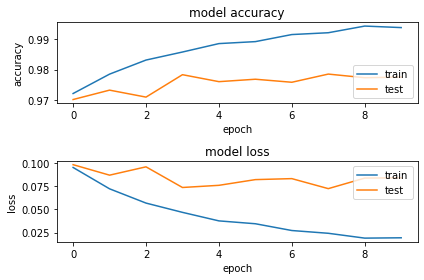

In [89]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

## Model Evaluation

In [90]:
loss_and_metrics = model6.evaluate(x_train, y_train, verbose=2)

print("Train Loss", loss_and_metrics[0])
print("Train Accuracy", loss_and_metrics[1])

Train Loss 0.014219007769529708
Train Accuracy 0.9959999918937683


In [91]:
loss_and_metrics = model6.evaluate(x_test, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

Test Loss 0.0839955280227121
Test Accuracy 0.9775000214576721


## 7. Network with Dropout, L2 regularizer, kernel initializer

In [92]:
model7= Sequential()

In [93]:
model7.add(Dropout(0.2,input_shape=(784,)))
model7.add(Dense(512, activation= 'sigmoid',kernel_regularizer=l2(l=0.005),kernel_initializer='uniform'))
model7.add(BatchNormalization())
model7.add(Dropout(rate=0.5))
model7.add(Dense(100, activation = 'relu', kernel_regularizer=l2(l=0.005),kernel_initializer='uniform'))
model7.add(BatchNormalization())
model7.add(Dropout(rate=0.5))
model7.add(Dense(n_classes, activation = 'softmax'))
model7.compile(optimizer="adam", loss = 'categorical_crossentropy', metrics = ['accuracy'])
model7.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_1 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_5 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 100)               51300     
_________________________________________________________________
batch_normalization_6 (Batch (None, 100)               400       
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)              

In [94]:
history = model7.fit(x_train, y_train, batch_size=128, epochs=10, verbose=True, validation_data= (x_test, y_test)) #validation_split=.1
loss, accuracy  = model7.evaluate(x_test, y_test, verbose=True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 139us/step - loss: 1.2485 - accuracy: 0.8386 - val_loss: 0.7766 - val_accuracy: 0.9177
Epoch 2/10
60000/60000 [==============================] - 9s 142us/step - loss: 0.6702 - accuracy: 0.8788 - val_loss: 0.4585 - val_accuracy: 0.9346
Epoch 3/10
60000/60000 [==============================] - 8s 133us/step - loss: 0.6084 - accuracy: 0.8838 - val_loss: 0.4373 - val_accuracy: 0.9355
Epoch 4/10
60000/60000 [==============================] - 8s 131us/step - loss: 0.6025 - accuracy: 0.8844 - val_loss: 0.4376 - val_accuracy: 0.9336
Epoch 5/10
60000/60000 [==============================] - 8s 128us/step - loss: 0.5983 - accuracy: 0.8896 - val_loss: 0.4306 - val_accuracy: 0.9412
Epoch 6/10
60000/60000 [==============================] - 8s 127us/step - loss: 0.6009 - accuracy: 0.8882 - val_loss: 0.4388 - val_accuracy: 0.9424
Epoch 7/10
60000/60000 [==============================] - 8s 1

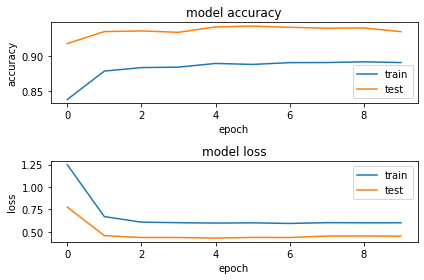

In [96]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

##  Model Evaluation

In [97]:
loss_and_metrics = model7.evaluate(x_train, y_train, verbose=2)

print("Train Loss", loss_and_metrics[0])
print("Train Accuracy", loss_and_metrics[1])

Train Loss 0.45169494859377546
Train Accuracy 0.9364500045776367


In [98]:
loss_and_metrics = model7.evaluate(x_test, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

Test Loss 0.452491814994812
Test Accuracy 0.934499979019165
